In [1]:
from Bio.Seq import Seq
from Bio import SeqIO
from collections import Counter
from Bio.PDB import PDBParser
import numpy as np
import pandas as pd


In [2]:
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score,classification_report,confusion_matrix
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import MinMaxScaler

In [3]:
import nglview as nv

In [7]:
pwd

'C:\\Users\\kunjk\\OneDrive\\Desktop\\project\\dataset\\genes'

In [9]:
for record in SeqIO.parse('lrrk2.fasta','fasta'):
    lrrk2_record = record
    lrrk2_dna = record.seq
print(lrrk2_record)

ID: NM_198578.4
Name: NM_198578.4
Description: NM_198578.4 Homo sapiens leucine rich repeat kinase 2 (LRRK2), mRNA
Number of features: 0
Seq('GGGGCCCGCGGGGAGCGCTGGCTGCGGGCGGTGAGCTGAGCTCGCCCCCGGGGA...AAA', SingleLetterAlphabet())


In [11]:
len(lrrk2_dna)

9239

In [12]:
mrna_lrrk2 = lrrk2_dna.transcribe()
mrna_lrrk2

Seq('GGGGCCCGCGGGGAGCGCUGGCUGCGGGCGGUGAGCUGAGCUCGCCCCCGGGGA...AAA', RNAAlphabet())

In [14]:
protein_lrrk2 = mrna_lrrk2.translate()
## * here is a stop codon

len(protein_lrrk2),protein_lrrk2

C:\Users\kunjk\kunj\lib\site-packages\Bio\Seq.py:2859: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning,


(3079,
 Seq('GARGERWLRAVS*ARPRGAVAGAPAGSLSSGRSCWEGGGLEAGATMASGSCQGC...KTL', HasStopCodon(ExtendedIUPACProtein(), '*')))

In [15]:
#finding all amino acids sequence before stop codon
lrrk2_aa= protein_lrrk2.split('*')
lrrk2_aa

[Seq('GARGERWLRAVS', HasStopCodon(ExtendedIUPACProtein(), '*')),
 Seq('ARPRGAVAGAPAGSLSSGRSCWEGGGLEAGATMASGSCQGCEEDEETLKKLIVR...SVE', HasStopCodon(ExtendedIUPACProtein(), '*')),
 Seq('ERNRNCLWIGKLFSPLVNIYFKNVHMERVLTFFEIARVYEGMLLFLI', HasStopCodon(ExtendedIUPACProtein(), '*')),
 Seq('IYVKILTSKCVF', HasStopCodon(ExtendedIUPACProtein(), '*')),
 Seq('RTI', HasStopCodon(ExtendedIUPACProtein(), '*')),
 Seq('NTMLYFL', HasStopCodon(ExtendedIUPACProtein(), '*')),
 Seq('IPVTFVH', HasStopCodon(ExtendedIUPACProtein(), '*')),
 Seq('LMKINL', HasStopCodon(ExtendedIUPACProtein(), '*')),
 Seq('ST', HasStopCodon(ExtendedIUPACProtein(), '*')),
 Seq('FKYSY', HasStopCodon(ExtendedIUPACProtein(), '*')),
 Seq('NL', HasStopCodon(ExtendedIUPACProtein(), '*')),
 Seq('GR', HasStopCodon(ExtendedIUPACProtein(), '*')),
 Seq('FFVFLSVMEVNFILNSVLKTGLLLVDFSRNLHGIMKILRQFPM', HasStopCodon(ExtendedIUPACProtein(), '*')),
 Seq('CIPS', HasStopCodon(ExtendedIUPACProtein(), '*')),
 Seq('IASKCTIIYACKYSNEFALIKSFVGM', HasStopCodo

In [16]:
lrrk2_aa_string = [str(i) for i in lrrk2_aa]
lrrk2_aa_string

['GARGERWLRAVS',
 'ARPRGAVAGAPAGSLSSGRSCWEGGGLEAGATMASGSCQGCEEDEETLKKLIVRLNNVQEGKQIETLVQILEDLLVFTYSERASKLFQGKNIHVPLLIVLDSYMRVASVQQVGWSLLCKLIEVCPGTMQSLMGPQDVGNDWEVLGVHQLILKMLTVHNASVNLSVIGLKTLDLLLTSGKITLLILDEESDIFMLIFDAMHSFPANDEVQKLGCKALHVLFERVSEEQLTEFVENKDYMILLSALTNFKDEEEIVLHVLHCLHSLAIPCNNVEVLMSGNVRCYNIVVEAMKAFPMSERIQEVSCCLLHRLTLGNFFNILVLNEVHEFVVKAVQQYPENAALQISALSCLALLTETIFLNQDLEEKNENQENDDEGEEDKLFWLEACYKALTWHRKNKHVQEAACWALNNLLMYQNSLHEKIGDEDGHFPAHREVMLSMLMHSSSKEVFQASANALSTLLEQNVNFRKILLSKGIHLNVLELMQKHIHSPEVAESGCKMLNHLFEGSNTSLDIMAAVVPKILTVMKRHETSLPVQLEALRAILHFIVPGMPEESREDTEFHHKLNMVKKQCFKNDIHKLVLAALNRFIGNPGIQKCGLKVISSIVHFPDALEMLSLEGAMDSVLHTLQMYPDDQEIQCLGLSLIGYLITKKNVFIGTGHLLAKILVSSLYRFKDVAEIQTKGFQTILAILKLSASFSKLLVHHSFDLVIFHQMSSNIMEQKDQQFLNLCCKCFAKVAMDDYLKNVMLERACDQNNSIMVECLLLLGADANQAKEGSSLICQVCEKESSPKLVELLLNSGSREQDVRKALTISIGKGDSQIISLLLRRLALDVANNSICLGGFCIGKVEPSWLGPLFPDKTSNLRKQTNIASTLARMVIRYQMKSAVEEGTASGSDGNFSEDVLSKFDEWTFIPDSSMDSVFAQSDDLDSEGSEGSFLVKKKSNSISVGEFYRDAVLQRCSPNLQRHSNSLGPIFDHEDLLKRK

In [17]:
#converting amino acids in to pandas
amino = pd.DataFrame({'amino_acids':lrrk2_aa_string})
amino.head()

,amino_acids
0,GARGERWLRAVS
1,ARPRGAVAGAPAGSLSSGRSCWEGGGLEAGATMASGSCQGCEEDEE...
2,ERNRNCLWIGKLFSPLVNIYFKNVHMERVLTFFEIARVYEGMLLFLI
3,IYVKILTSKCVF
4,RTI


In [18]:
amino['count'] = amino['amino_acids'].str.len()
amino.head()

,amino_acids,count
0,GARGERWLRAVS,12
1,ARPRGAVAGAPAGSLSSGRSCWEGGGLEAGATMASGSCQGCEEDEE...,2559
2,ERNRNCLWIGKLFSPLVNIYFKNVHMERVLTFFEIARVYEGMLLFLI,47
3,IYVKILTSKCVF,12
4,RTI,3


In [19]:
#largest sequence before stop codon
amino.nlargest(10,'count') 

,amino_acids,count
1,ARPRGAVAGAPAGSLSSGRSCWEGGGLEAGATMASGSCQGCEEDEE...,2559
20,YFYFFIHTTSYLFSNLLHSNAYIHLFPKFVMLQILHHSDRNLFFFQ...,57
38,LTKKSYIIELFVPVLSLSLLLCICNFFYQRQIKKMNTIFKWNNKGF...,50
2,ERNRNCLWIGKLFSPLVNIYFKNVHMERVLTFFEIARVYEGMLLFLI,47
12,FFVFLSVMEVNFILNSVLKTGLLLVDFSRNLHGIMKILRQFPM,43
16,HTVKVLISRKDTETLFVTETLCVFPRHNRVVFQLYV,36
15,ILFVAVANSASYTTSLNSKENSIKSTNEKT,30
22,ISNTFQLLKEKGALVMMDKNICHPRLPNYT,30
14,IASKCTIIYACKYSNEFALIKSFVGM,26
23,IVYIAYHNRSIRAKYLCNNLRSFLL,25


In [21]:
#finding the most common proteins in with the frequency available in the sequence
Counter(protein_lrrk2).most_common(10)

[('L', 422),
 ('S', 245),
 ('K', 210),
 ('I', 203),
 ('E', 201),
 ('V', 193),
 ('N', 163),
 ('A', 148),
 ('G', 139),
 ('F', 138)]

C:\Users\kunjk\kunj\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


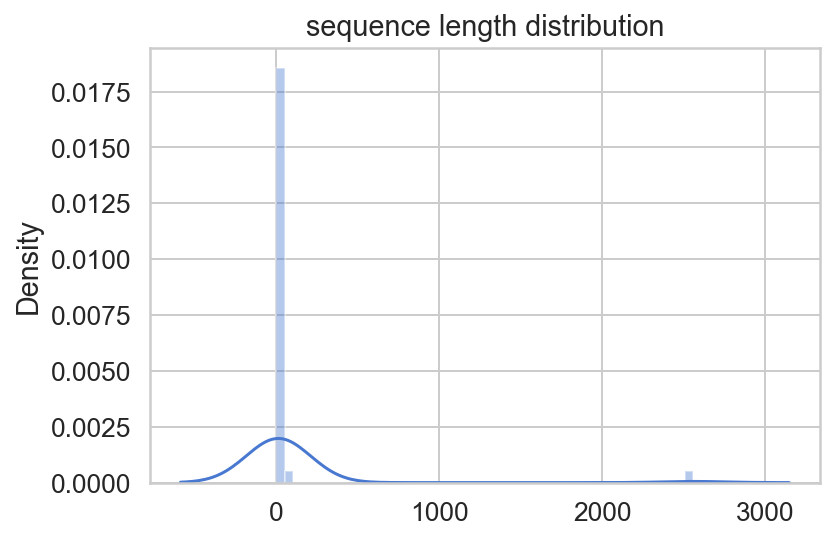

In [22]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid',palette='muted',font_scale=1.2)
ax = sns.distplot(amino['count'].values)
plt.title(f'sequence length distribution')
plt.grid(True) 

In [23]:
amino.to_csv('lrrk2.csv',sep=',')